In [1]:
# ECS 171 Machine Learning Research Project
# Group 12
# Communal Attributes vs. Violent Crimes Per 100K


# Import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import tensorflow

# Set random seed to produce reproducible results
tensorflow.random.set_seed(1)

# Import all necessary tools
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

# Read in the data file
file = open('communities.csv', 'r', newline = '')
df = pd.read_csv(file, delimiter = ',')

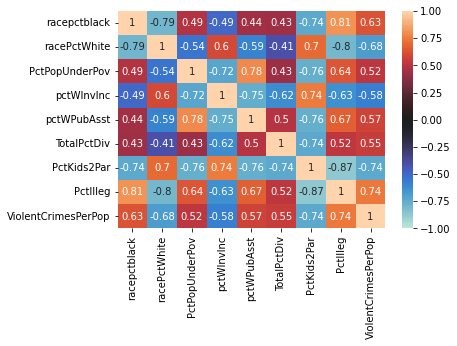

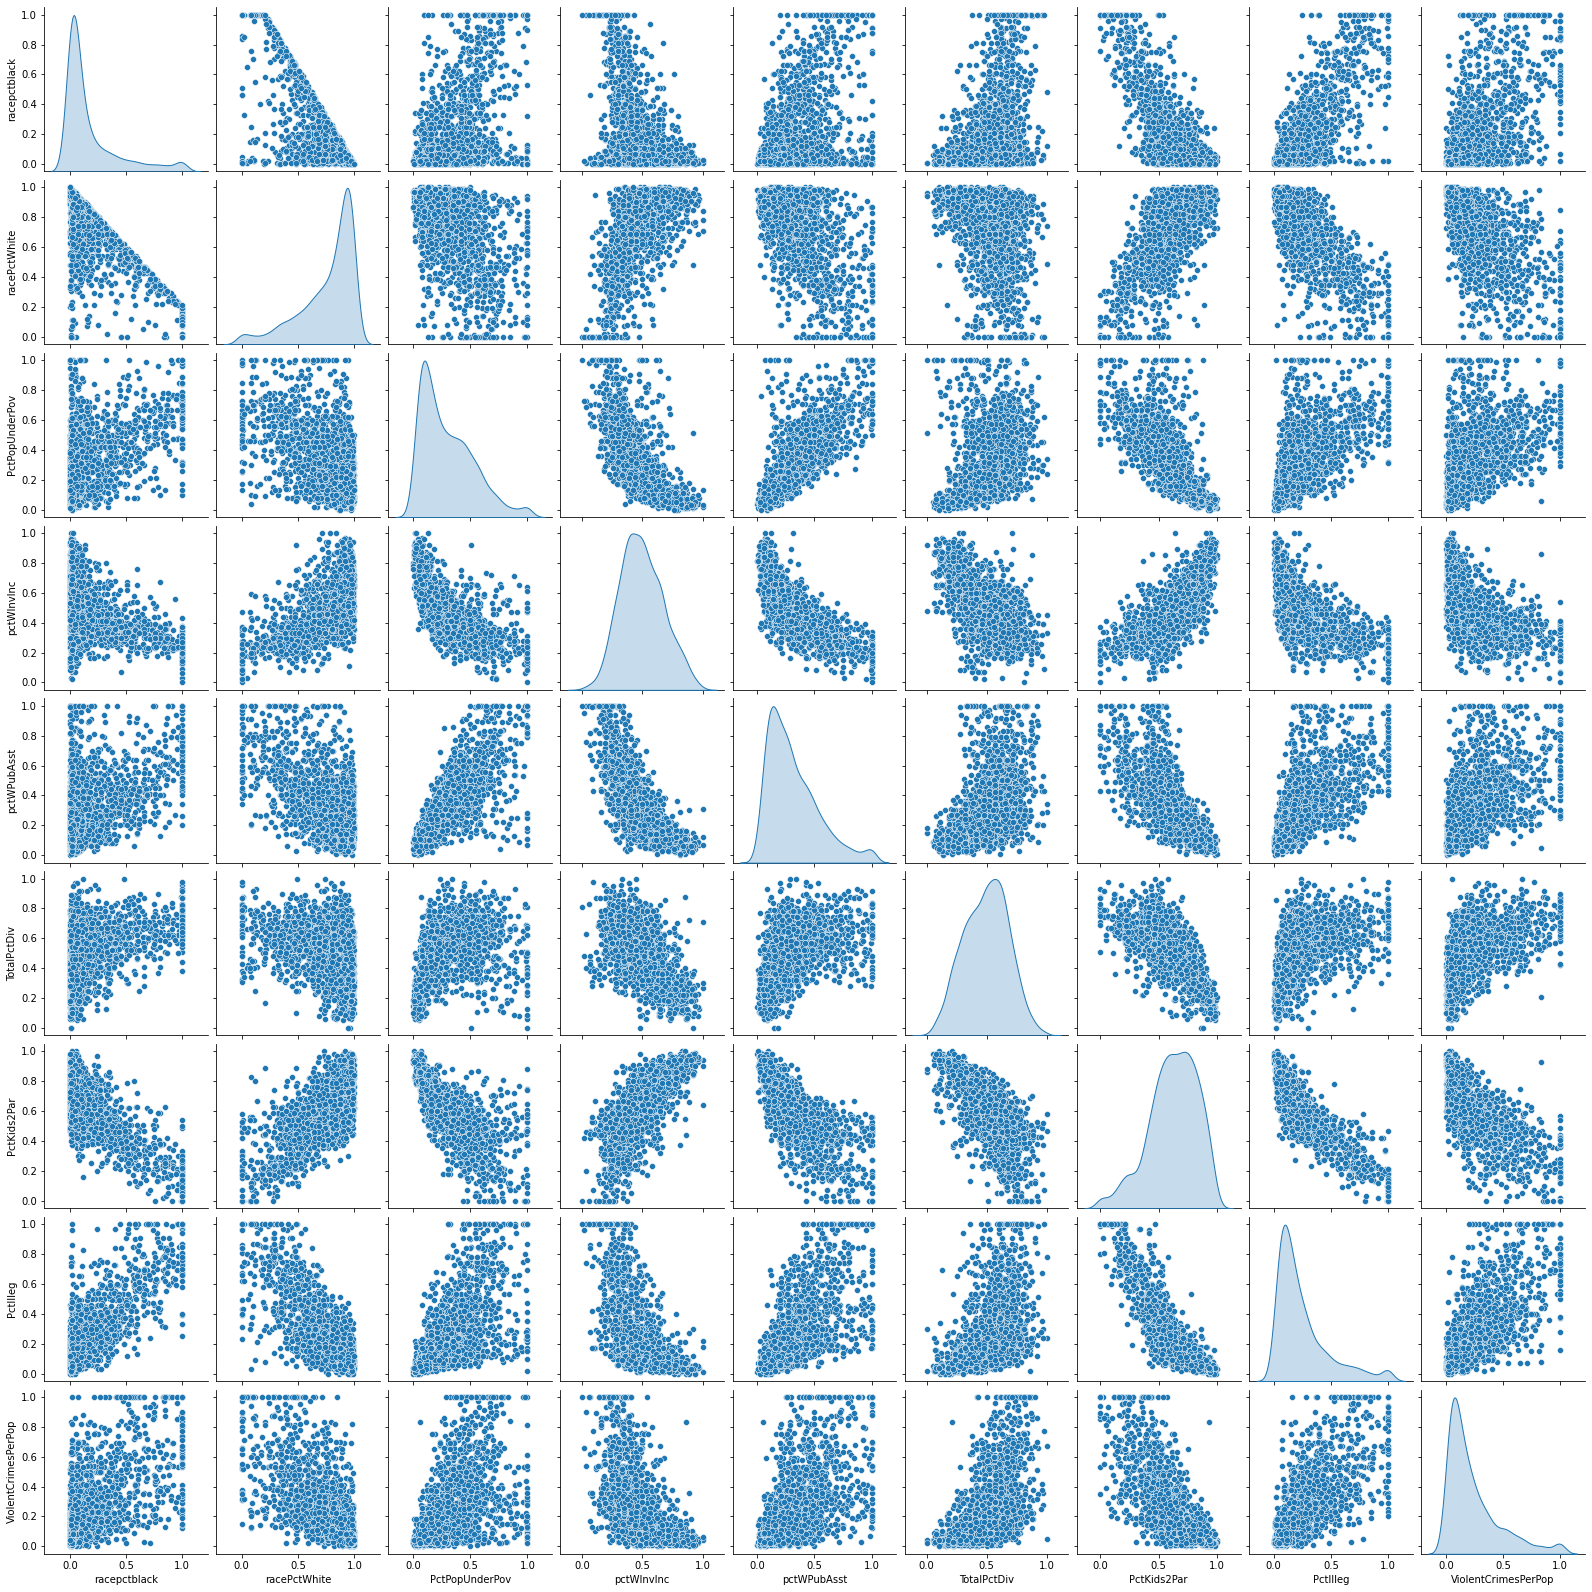

In [2]:
# Create heatmap
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

# Create pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()


Family Linear Regression Model Mean Squared Error:  0.019800573421352132


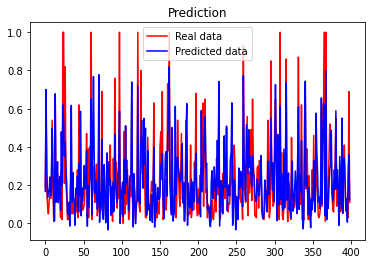

In [3]:
# Familial Attributes vs. Violent Crimes Per 100K Linear Regression Model

# Split the data set into training and testing data with a 80:20 ratio
inputColumns = df[['PctKids2Par','PctIlleg','TotalPctDiv']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test, y_train, y_test = train_test_split(inputColumns, outputColumn,test_size = 0.2, random_state = 21)

# Train the model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Make predictions
reg_predictions = reg.predict(x_test)

# Print the mean squared error
print('\nFamily Linear Regression Model Mean Squared Error: ', mean_squared_error(y_test, reg_predictions))

# Plot Real Data vs. Predicted Data
plt.plot(y_test.to_numpy(), color = 'red', label = 'Real data')
plt.plot(reg_predictions, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [4]:
# K-fold cross validation for familial attributes

reg2 = LinearRegression()
kf = KFold(n_splits = 10)

sum_mse = 0

x = df[['PctKids2Par','PctIlleg','TotalPctDiv']].to_numpy()
y = df['ViolentCrimesPerPop']

# Get MSE in each iteration and add to sum_mse variable
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg2.fit(x_train, y_train)
    reg2_pred = reg2.predict(x_test)
    mse = mean_squared_error(y_test, reg2_pred)
    print('MSE:', mse)
    sum_mse = sum_mse + mse

# Calculate average MSE
avg_mse = sum_mse / 10

# Print MSE
print('Family Linear Regression Model Average MSE:', avg_mse)

MSE: 0.026345032236632707
MSE: 0.024103150493599276
MSE: 0.03340683071857402
MSE: 0.022408702383303024
MSE: 0.02102720026967184
MSE: 0.017738531140982682
MSE: 0.020387200565629822
MSE: 0.01612819683219544
MSE: 0.02099793161850632
MSE: 0.02069246469802224
Family Linear Regression Model Average MSE: 0.022323524095711735



Wealth Linear Regression Model Mean Squared Error:  0.030321798734355372


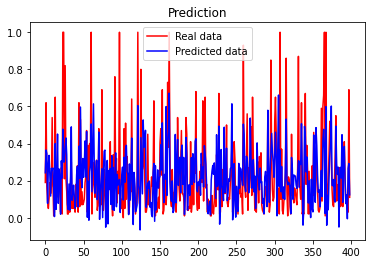

In [5]:
# Wealth Attributes vs. Violent Crimes Per 100K Linear Regression Model

# Split the data set into training and testing data with a 80:20 ratio
inputColumns = df[['PctPopUnderPov','pctWPubAsst','pctWInvInc']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test,y_train, y_test = train_test_split(inputColumns, outputColumn,test_size = 0.2, random_state = 21)

# Train the model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Make predictions
reg_predictions = reg.predict(x_test)

# Print the mean squared error
print('\nWealth Linear Regression Model Mean Squared Error: ', mean_squared_error(y_test, reg_predictions))

# Plot Real Data vs. Predicted Data
plt.plot(y_test.to_numpy(), color = 'red', label = 'Real data')
plt.plot(reg_predictions, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [6]:
# K-fold cross validation for wealth attributes

reg2 = LinearRegression()
kf = KFold(n_splits = 10)

sum_mse = 0

x = df[['PctPopUnderPov','pctWPubAsst','pctWInvInc']].to_numpy()
y = df['ViolentCrimesPerPop']

# Get MSE in each iteration and add to sum_mse variable
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg2.fit(x_train, y_train)
    reg2_pred = reg2.predict(x_test)
    mse = mean_squared_error(y_test, reg2_pred)
    print('MSE:', mse)
    sum_mse = sum_mse + mse

# Calculate average MSE
avg_mse = sum_mse / 10

# Print MSE
print('Wealth Linear Regression Model Average MSE:', avg_mse)

MSE: 0.035339455335832826
MSE: 0.03721363352188417
MSE: 0.04107310388276358
MSE: 0.03848896869582548
MSE: 0.03473219562374281
MSE: 0.03150931478087762
MSE: 0.029270965372348183
MSE: 0.026545049876360242
MSE: 0.0325292553148219
MSE: 0.03039521669894854
Wealth Linear Regression Model Average MSE: 0.03370971591034053



Race Linear Regression Model Mean Squared Error:  0.025489769235888884


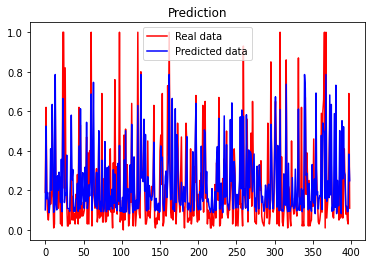

In [7]:
# Race Attributes vs. Violent Crimes Per 100K Linear Regression Model

# Split the data set into training and testing data with a 80:20 ratio
inputColumns = df[['racepctblack','racePctWhite']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test,y_train, y_test = train_test_split(inputColumns, outputColumn,test_size = 0.2, random_state = 21)

# Train the model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Make predictions
reg_predictions = reg.predict(x_test)

# Print the mean squared error
print('\nRace Linear Regression Model Mean Squared Error: ', mean_squared_error(y_test, reg_predictions))

# Plot Real Data vs. Predicted Data
plt.plot(y_test.to_numpy(), color = 'red', label = 'Real data')
plt.plot(reg_predictions, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [8]:
# K-fold cross validation for race attributes

reg2 = LinearRegression()
kf = KFold(n_splits = 10)

sum_mse = 0

x = df[['racepctblack','racePctWhite']].to_numpy()
y = df['ViolentCrimesPerPop']

# Get MSE in each iteration and add to sum_mse variable
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg2.fit(x_train, y_train)
    reg2_pred = reg2.predict(x_test)
    mse = mean_squared_error(y_test, reg2_pred)
    print('MSE:', mse)
    sum_mse = sum_mse + mse

# Calculate average MSE
avg_mse = sum_mse / 10

# Print MSE
print('Race Linear Regression Model Average MSE:', avg_mse)

MSE: 0.03152649305438591
MSE: 0.027909644027832615
MSE: 0.03553488788199711
MSE: 0.027621859453439753
MSE: 0.025398650666533858
MSE: 0.024569276159286352
MSE: 0.028866103132199956
MSE: 0.023979133016899353
MSE: 0.02682052591499293
MSE: 0.02570072826775232
Race Linear Regression Model Average MSE: 0.02779273015753202



All Attributes Linear Regression Model Mean Squared Error:  0.018916681213162378


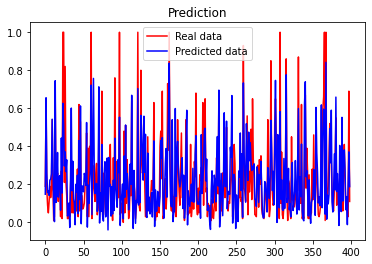

In [9]:
# All Attributes vs. Violent Crimes Per 100K Linear Regression Model

# Split the data set into training and testing data with a 80:20 ratio
inputColumns = df[['PctKids2Par','PctIlleg','TotalPctDiv','racepctblack','racePctWhite',
                   'PctPopUnderPov','pctWPubAsst','pctWInvInc']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test,y_train, y_test = train_test_split(inputColumns, outputColumn,test_size = 0.2, random_state = 21)

# Train the model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Make predictions
reg_predictions = reg.predict(x_test)

# Print the mean squared error
print('\nAll Attributes Linear Regression Model Mean Squared Error: ', mean_squared_error(y_test, reg_predictions))

# Plot Real Data vs. Predicted Data
plt.plot(y_test.to_numpy(), color = 'red', label = 'Real data')
plt.plot(reg_predictions, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [10]:
# K-fold cross validation for all attributes

reg2 = LinearRegression()
kf = KFold(n_splits = 10)

sum_mse = 0

x = df.drop(columns = ['ViolentCrimesPerPop']).to_numpy()
y = df['ViolentCrimesPerPop']

# Get MSE in each iteration and add to sum_mse variable
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg2.fit(x_train, y_train)
    reg2_pred = reg2.predict(x_test)
    mse = mean_squared_error(y_test, reg2_pred)
    print('MSE:', mse)
    sum_mse = sum_mse + mse

# Calculate average MSE
avg_mse = sum_mse / 10

# Print MSE
print('All Attributes Linear Regression Model Average MSE:', avg_mse)

MSE: 0.024421074129946138
MSE: 0.021957326289128574
MSE: 0.029646916967035617
MSE: 0.022231413994066838
MSE: 0.019892430104690103
MSE: 0.017386771876898816
MSE: 0.019961261543826495
MSE: 0.015644956122021755
MSE: 0.019330807622066817
MSE: 0.019963008823498562
All Attributes Linear Regression Model Average MSE: 0.02104359674731797



Family Neural Network Model Mean Squared Error: 0.018840378150343895


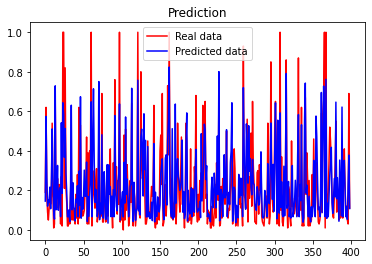

In [11]:
# Familial Attributes vs. Violent Crimes Per 100K Neural Network Model

# Function to create a neural network (return a function that returns the generated model)
def createNeuralNetwork(nodes1, nodes2, nodes3, learning_rate=0.001, name='model'):

    # Function that creates the model
    def neuralNetworkModel():
        model = Sequential(name=name)
        model.add(Dense(nodes1, activation='relu', input_dim=3))
        model.add(Dense(nodes2, activation = 'relu'))
        model.add(Dense(nodes3, activation = 'relu'))
        model.add(Dense(1))

        model.compile(loss='mse', 
                      optimizer=Adam(learning_rate))
        return model

    # Return the function defined above
    return neuralNetworkModel


# Create a neural network
neuralNetworkModel = createNeuralNetwork(40, 10, 4, 0.001, 'family')
neuralNetwork = neuralNetworkModel()

# Create the training data which will be used to train the model
inputColumns = df[['PctKids2Par','PctIlleg','TotalPctDiv']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test, y_train, y_test = train_test_split(inputColumns, outputColumn, test_size = 0.2, random_state = 21)

# Train the neural network model
neuralNetwork.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)

scores = neuralNetwork.evaluate(x_test, y_test, verbose = 0)
print('\nFamily Neural Network Model Mean Squared Error:', scores)

y_pred = neuralNetwork.predict(x_test)
plt.plot(y_test.to_numpy(), color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [12]:
# K-fold cross validation for neural network with familial attributes

kf = KFold(n_splits = 10)

sum_mse = 0

x = df[['PctKids2Par','PctIlleg','TotalPctDiv']].to_numpy()
y = df['ViolentCrimesPerPop']

# Get MSE in each iteration and add to sum_mse variable
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    neuralNetwork.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)
    scores = neuralNetwork.evaluate(x_test, y_test, verbose = 0)
    print('MSE:',scores)
    sum_mse = sum_mse + scores

# Calculate average MSE
avg_mse = sum_mse / 10

# Print MSE
print('\nFamily Neural Network Model Average Mean Squared Error:', avg_mse)

MSE: 0.025675995275378227
MSE: 0.024120328947901726
MSE: 0.031656909734010696
MSE: 0.023150654509663582
MSE: 0.018593957647681236
MSE: 0.01711573638021946
MSE: 0.019058721140027046
MSE: 0.015927232801914215
MSE: 0.018666062504053116
MSE: 0.020290741696953773

Family Neural Network Model Average Mean Squared Error: 0.021425634063780306



Wealth Neural Network Model Mean Squared Error: 0.028751734644174576


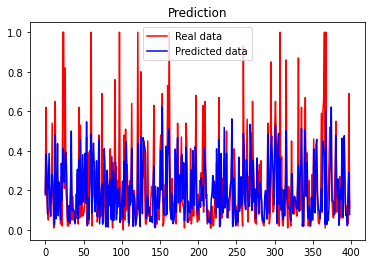

In [13]:
# Wealth Attributes vs. Violent Crimes Per 100K Neural Network Model

# Function to create a neural network (return a function that returns the generated model)
def createNeuralNetwork(nodes1, nodes2, nodes3, learning_rate=0.001, name='model'):

    # Function that creates the model
    def neuralNetworkModel():
        model = Sequential(name=name)
        model.add(Dense(nodes1, activation='relu', input_dim=3))
        model.add(Dense(nodes2, activation = 'relu'))
        model.add(Dense(nodes3, activation = 'relu'))
        model.add(Dense(1))

        model.compile(loss='mse', 
                      optimizer=Adam(learning_rate))
        return model

    # Return the function defined above
    return neuralNetworkModel

# Create a neural network
neuralNetworkModel = createNeuralNetwork(40, 10, 4, 0.001, 'race')
neuralNetwork = neuralNetworkModel()

# Create the training data which will be used to train the model
inputColumns = df[['PctPopUnderPov','pctWPubAsst','pctWInvInc']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test, y_train, y_test = train_test_split(inputColumns, outputColumn, test_size = 0.2, random_state=21)

# Train the neural network model
neuralNetwork.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)

scores = neuralNetwork.evaluate(x_test, y_test, verbose = 0)
print('\nWealth Neural Network Model Mean Squared Error:', scores)

y_pred = neuralNetwork.predict(x_test)
plt.plot(y_test.to_numpy(), color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [14]:
# K-fold cross validation for neural network with wealth attributes

kf = KFold(n_splits = 10)

sum_mse = 0

x = df[['PctPopUnderPov','pctWPubAsst','pctWInvInc']].to_numpy()
y = df['ViolentCrimesPerPop']

# Get MSE in each iteration and add to sum_mse variable
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    neuralNetwork.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)
    scores = neuralNetwork.evaluate(x_test, y_test, verbose = 0)
    print('MSE:',scores)
    sum_mse = sum_mse + scores

# Calculate average MSE
avg_mse = sum_mse / 10

# Print MSE
print('\nWealth Neural Network Model Average Mean Squared Error:', avg_mse)

MSE: 0.03266084939241409
MSE: 0.03388645872473717
MSE: 0.035560134798288345
MSE: 0.03395433351397514
MSE: 0.03175196424126625
MSE: 0.028651757165789604
MSE: 0.02998846210539341
MSE: 0.023810673505067825
MSE: 0.02931320294737816
MSE: 0.02969435043632984

Wealth Neural Network Model Average Mean Squared Error: 0.030927218683063983



Race Neural Network Model Mean Squared Error: 0.02539687231183052


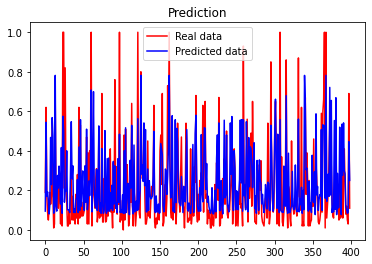

In [15]:
# Race Attributes vs. Violent Crimes Per 100K Neural Network Model

# Function to create a neural network (return a function that returns the generated model)
def createNeuralNetwork(nodes1, nodes2, nodes3, learning_rate=0.001, name='model'):

    # Function that creates the model
    def neuralNetworkModel():
        model = Sequential(name=name)
        model.add(Dense(nodes1, activation='relu', input_dim=2))
        model.add(Dense(nodes2, activation = 'relu'))
        model.add(Dense(nodes3, activation = 'relu'))
        model.add(Dense(1))

        model.compile(loss='mse', 
                      optimizer=Adam(learning_rate))
        return model

    # Return the function defined above
    return neuralNetworkModel


# Create a neural network
neuralNetworkModel = createNeuralNetwork(40, 10, 4, 0.001, 'race')
neuralNetwork = neuralNetworkModel()

# Create the training data which will be used to train the model
inputColumns = df[['racepctblack','racePctWhite']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test, y_train, y_test = train_test_split(inputColumns, outputColumn, test_size = 0.2, random_state = 21)

# Train the neural network model
neuralNetwork.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)

scores = neuralNetwork.evaluate(x_test, y_test, verbose = 0)
print('\nRace Neural Network Model Mean Squared Error:', scores)

y_pred = neuralNetwork.predict(x_test)
plt.plot(y_test.to_numpy(), color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [16]:
# K-fold cross validation for neural network with race attributes

kf = KFold(n_splits = 10)

sum_mse = 0

x = df[['racepctblack','racePctWhite']].to_numpy()
y = df['ViolentCrimesPerPop']

# Get MSE in each iteration and add to sum_mse variable
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    neuralNetwork.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)
    scores = neuralNetwork.evaluate(x_test, y_test, verbose = 0)
    print('MSE:',scores)
    sum_mse = sum_mse + scores

# Calculate average MSE
avg_mse = sum_mse / 10

# Print MSE
print('\nRace Neural Network Model Average Mean Squared Error:', avg_mse)

MSE: 0.03107891045510769
MSE: 0.028490625321865082
MSE: 0.03511280193924904
MSE: 0.02603202313184738
MSE: 0.025286313146352768
MSE: 0.02484522946178913
MSE: 0.02840459533035755
MSE: 0.024638835340738297
MSE: 0.025066819041967392
MSE: 0.024797221645712852

Race Neural Network Model Average Mean Squared Error: 0.02737533748149872



All Attributes Neural Network Model Mean Squared Error: 0.017376355826854706


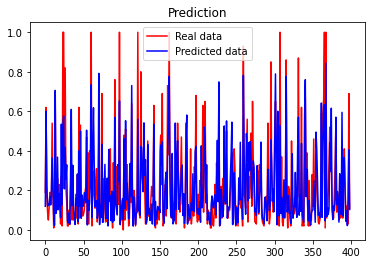

In [17]:
# All Attributes vs. Violent Crimes Per 100K Neural Network Model

# Function to create a neural network (return a function that returns the generated model)
def createNeuralNetwork(nodes1, nodes2, nodes3, learning_rate=0.001, name='model'):

    # Function that creates the model
    def neuralNetworkModel():
        model = Sequential(name=name)
        model.add(Dense(nodes1, activation='relu', input_dim=8))
        model.add(Dense(nodes2, activation = 'relu'))
        model.add(Dense(nodes3, activation = 'relu'))
        model.add(Dense(1))

        model.compile(loss='mse', 
                      optimizer=Adam(learning_rate))
        return model

    # Return the function defined above
    return neuralNetworkModel


# Create a neural network
neuralNetworkModel = createNeuralNetwork(40, 10, 4, 0.001, 'race')
neuralNetwork = neuralNetworkModel()

# Create the training data which will be used to train the model
inputColumns = df[['PctKids2Par','PctIlleg','TotalPctDiv','racepctblack','racePctWhite',
                   'PctPopUnderPov','pctWPubAsst','pctWInvInc']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test, y_train, y_test = train_test_split(inputColumns, outputColumn, test_size = 0.2, random_state = 21)

# Train the neural network model
neuralNetwork.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)

scores = neuralNetwork.evaluate(x_test, y_test, verbose = 0)
print('\nAll Attributes Neural Network Model Mean Squared Error:', scores)

y_pred = neuralNetwork.predict(x_test)
plt.plot(y_test.to_numpy(), color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [18]:
# K-fold cross validation for neural network with all attributes

kf = KFold(n_splits = 10)

sum_mse = 0

x = df.drop(columns = ['ViolentCrimesPerPop']).to_numpy()
y = df['ViolentCrimesPerPop']

# Get MSE in each iteration and add to sum_mse variable
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    neuralNetwork.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0)
    scores = neuralNetwork.evaluate(x_test, y_test, verbose = 0)
    print('MSE:',scores)
    sum_mse = sum_mse + scores

# Calculate average MSE
avg_mse = sum_mse / 10

# Print MSE
print('\nAll Attributes Neural Network Model Average Mean Squared Error:', avg_mse)

MSE: 0.025239843875169754
MSE: 0.020110158249735832
MSE: 0.02516886219382286
MSE: 0.01879885606467724
MSE: 0.0185531098395586
MSE: 0.012337680906057358
MSE: 0.017474470660090446
MSE: 0.013277396559715271
MSE: 0.014385808259248734
MSE: 0.014546935446560383

All Attributes Neural Network Model Average Mean Squared Error: 0.017989312205463646
